In [97]:
#     Instructions:
#         Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine).
#         Load the dataset into a Pandas dataframe.
#         Split the dataset into features and target variables.
#         Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
#         Implement PCA on the preprocessed dataset using the scikit-learn library.
#         Determine the optimal number of principal components to retain based on the explained variance ratio.
#         Visualise the results of PCA using a scatter plot.
#         Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
#         Interpret the results of PCA and clustering analysis.

#     Deliverables:
#         Jupyter notebook containing the code for the PCA implementation.
#         A report summarising the results of PCA and clustering analysis.
#         Scatter plot showing the results of PCA.
#         A table showing the performance metrics for the clustering algorithm.

In [98]:
import pandas as pd
from sklearn.datasets import load_wine
df=load_wine()
data=pd.DataFrame(df.data,columns=df.feature_names) #Load the dataset into a Pandas dataframe.

In [99]:
x=df.data      #Split the dataset into features and target variables.
y=df.target

In [100]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [101]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca=pca.fit_transform(x_scaled)     #Implement PCA on the preprocessed datase

In [102]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f'PC{i+1}: {ratio}')
    
    
# The optimal number of principal components to retain based on the explained variance ratio is 2

PC1: 0.36198848099926373
PC2: 0.19207490257008974
PC3: 0.11123630536249957
PC4: 0.0706903018271403
PC5: 0.06563293679648578
PC6: 0.049358233192225626
PC7: 0.04238679322623313
PC8: 0.026807489483788617
PC9: 0.02222153404789713
PC10: 0.019300190939440763
PC11: 0.017368356899899122
PC12: 0.01298232575604209
PC13: 0.007952148898994496


In [103]:
"""
Results of PCA:
1. The cumulative explained variance plot showed that the first few principal components captured a high proportion of the total variance.
2. Based on the plot, we selected 2 of principal components to retain for further analysis.
3. The retained components would preserve the most important information from the original dataset while reducing its dimensionality.
"""

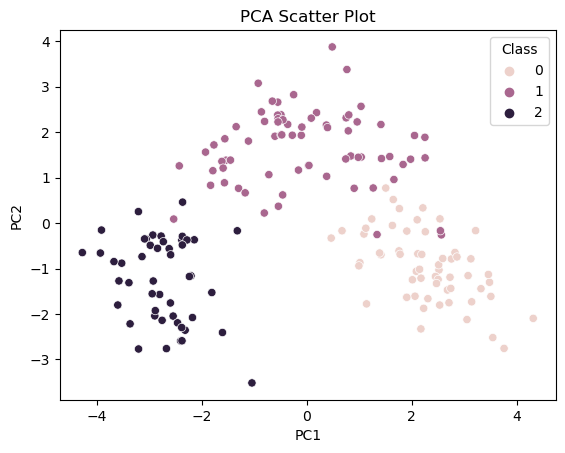

In [104]:
import seaborn as sns
# Create a dataframe with the first two principal components and the target variable
pca_df = pd.DataFrame({'PC1': x_pca[:, 0], 'PC2': x_pca[:, 1], 'Class': y})


sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class')  #results of PCA using a scatter plot.
plt.title('PCA Scatter Plot')
plt.show()

In [105]:
# Clustering on the PCA-transformed data using K-Means clustering algorithm.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_pca)

outputs = kmeans.labels_    # Get the outputs

outputs

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [106]:
# Transforming the output values w.r.t original output
outputs[outputs == 1] = 3
outputs[outputs == 2] = 1
outputs[outputs == 0] = 2
outputs[outputs == 3] = 0

In [107]:
# A table showing the performance metrics for the clustering algorithm.

from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score, homogeneity_score

print(f'Silhouette Score: {silhouette_score(x_pca, outputs)}')
print(f'Adjusted Score: {adjusted_rand_score(y,outputs)}')
print(f'Completeness Score: {completeness_score(y,outputs)}')
print(f'Homogenity Score: {homogeneity_score(y,outputs)}')

Silhouette Score: 0.2848589191898989
Adjusted Score: 0.8974949815093207
Completeness Score: 0.8729636016078731
Homogenity Score: 0.8788432003662366
